In [ ]:
#For Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("font", size=7)
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.metrics import r2_score,mean_squared_error

import warnings
warnings.filterwarnings("ignore")

#For Random Forest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

#For KNN
import csv
import random
import math
import operator

# Linear Regression with Mini Batch Gradient Descent

In [ ]:
df = pd.read_csv("Dummy Data HSS.csv")

In [ ]:
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [ ]:
#Separating input features and ouput
col = list(df.columns)
col.pop()
X = pd.DataFrame(df,columns = col)
y = df.Sales

In [ ]:
#Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

In [ ]:
train_data =  pd.concat([X_train, y_train], axis=1)

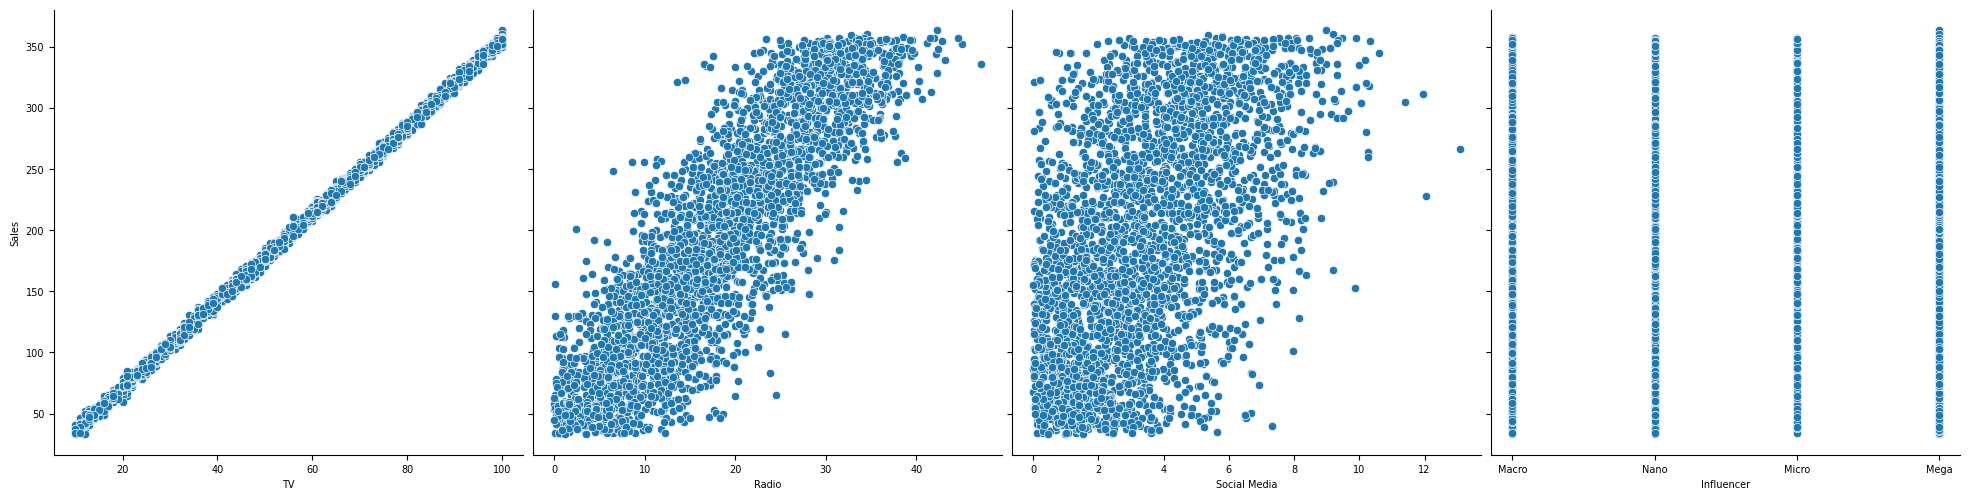

In [ ]:
sns.pairplot(train_data, x_vars=['TV', 'Radio', 'Social Media', 'Influencer'], y_vars=['Sales'], height = 5, kind='scatter')
plt.show()

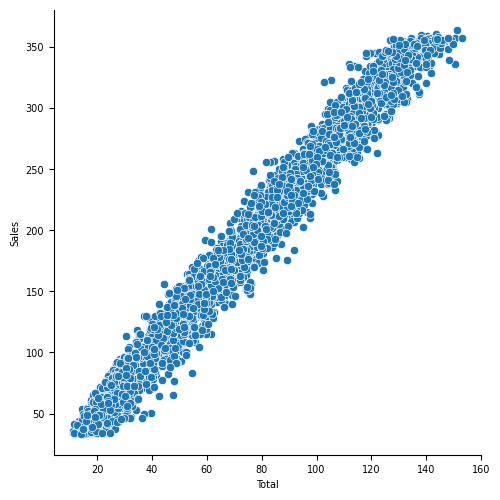

In [ ]:
#New Features
train_data['Total'] = train_data['TV'] + train_data['Radio'] + train_data['Social Media']
sns.pairplot(train_data, x_vars=['Total'], y_vars=['Sales'], height = 5, kind='scatter')
plt.show()

# 1. Linear Regression with Mini Barch Gradient Descent


In [ ]:
#Data Preprocessing and Feature Engineering
df_lr = df.copy()
df_lr['Total'] = df_lr['TV'] + df_lr['Radio'] + df_lr['Social Media']
df_lr = df_lr.drop(['Influencer', 'Social Media'], axis = 1)
df_lr.head()

,TV,Radio,Sales,Total
0,16.0,6.566231,54.732757,25.474214
1,13.0,9.237765,46.677897,24.647332
2,41.0,15.886446,150.177829,59.799856
3,83.0,30.020028,298.246340,119.942332
4,15.0,8.437408,56.594181,24.843406


In [ ]:
#Handling Missing Data
#KNN Imputation in numerical data

imputer = KNNImputer(n_neighbors=20)
imputed = imputer.fit_transform(df_lr)
df_imputed = pd.DataFrame(imputed, columns = df_lr.columns)
df_imputed_final = df_imputed.copy()
for i in df_lr.columns:
  if df_lr[i].dtypes==object:
    df_imputed_final[i] = df_lr[i]

df_imputed_final.isnull().sum()

TV       0
Radio    0
Sales    0
Total    0
dtype: int64

In [ ]:
#Test Train Split
col = list(df_imputed_final.columns)
col.pop()
X_lr = pd.DataFrame(df_imputed_final,columns = col)
y_lr = df_imputed_final.Sales
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr,y_lr,test_size = 0.33, random_state = 42)

X_train_lr = X_train_lr.to_numpy()
X_train_lr = np.hstack((np.ones((X_train_lr.shape[0], 1)), X_train_lr))
y_train_lr = y_train_lr.to_numpy().reshape((-1,1))

X_test_lr = X_test_lr.to_numpy()
X_test_lr = np.hstack((np.ones((X_test_lr.shape[0], 1)), X_test_lr))
y_test_lr = y_test_lr.to_numpy().reshape((-1,1))

In [ ]:
X_train_rr = X_train_lr.copy()
y_train_rr = y_train_lr.copy()
X_test_rr = X_test_lr.copy()
y_test_rr = y_test_lr.copy()

In [ ]:
# Linear Regression Function Defintinon
def normalize_features(X):
    means = np.mean(X[:, 1:], axis=0)
    stds = np.std(X[:, 1:], axis=0)
    X[:, 1:] = (X[:, 1:] - means) / stds
    return X, means, stds

def grad(X, y, theta):
  l = len(y)
  p = np.dot(X,theta)
  errors = p - y
  gradients = (1 / l) * (np.dot(X.transpose(), errors))
  return gradients

def cost_func(X, y, theta):
  l = len(y)
  p = np.dot(X,theta)
  cost = (1 / (2 * l)) * np.sum((p - y) ** 2)
  return cost

def mini_batch_creation(X,y,mb_size):
  mb = []
  data = np.hstack((X, y))
  np.random.shuffle(data)
  num_mb = data.shape[0] // mb_size
  for i in range(num_mb+1):
    split = data[mb_size*i:mb_size*(i+1):]
    X_new = split[:,:-1]
    y_new = split[:,-1].reshape((-1,1))
    mb.append((X_new,y_new))
  if data.shape[0]%mb_size!=0:
    split = data[i * mb_size:data.shape[0]]
    X_new = split[:,:-1]
    y_new = split[:,-1].reshape((-1,1))
    mb.append((X_new,y_new))
  return mb

def gd(X,y,alpha,mb_size, epochs):
  theta = np.zeros((X.shape[1], 1))
  cost_lis = []
  for epoch in range(epochs):
      mini_batches = mini_batch_creation(X, y, mb_size)
      for mb in mini_batches:
          X_mini, y_mini = mb
          theta -= alpha * grad(X_mini, y_mini, theta)
          cost_lis.append(cost_func(X_mini, y_mini, theta))


  return theta, cost_lis

Bias =  [193.38471553]
Coefficients =  [[43.67609788]
 [ 5.56774112]
 [44.16995595]]


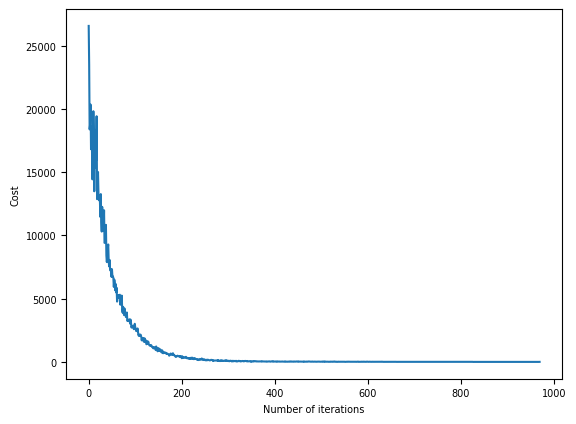

In [ ]:
#Linear Regression Implementation
X_train_lr,_,_ = normalize_features(X_train_lr)
theta, cost_lis = gd(X_train_lr, y_train_lr, 0.01, 32, 10)
print("Bias = ", theta[0])
print("Coefficients = ", theta[1:])

# visualising gradient descent
plt.plot(cost_lis)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [ ]:
X_test_lr,_,_ = normalize_features(X_test_lr)
y_pred_lr = np.dot(X_test_lr,theta)

In [ ]:
r2_lin_reg = r2_score(y_test_lr,y_pred_lr)
print('Root square error:',r2_lin_reg)

Root square error: 0.99793373678669


# Ridge Regression with Cross Validation

In [ ]:
#Computing the gradient of the cost function with L2 regularization (Ridge penalty).
def gradient_calculation(X,y,theta,l2_penality):
    l = len(y)
    p = np.dot(X,theta)
    errors = p - y
    gradients = (1 / l) * ( (np.dot(X.transpose(), errors)) + l2_penality * theta)
    return gradients

#Computing the cost function (Mean Squared Error) for a mini-batch of data
def cost_func(X_mini, y_mini,theta):
    l = len(y_mini)
    p = np.dot(X_mini,theta)
    cost = (1 / (2 * l)) * np.sum((p - y_mini) ** 2)
    return cost

#Ridge Regression Class
class Ridge():
  def __init__(self, learning_rate, iterations, penalty, mini_batch_size):
    self.learning_rate = learning_rate
    self.iterations = iterations
    self.penalty = penalty
    self.mb_size = mini_batch_size
    self.mb = []

  #Normalizing the feature matrix to have zero mean and unit variance.
  def normalize_features(self):
    means = np.mean(self.X[:, 1:], axis=0)
    stds = np.std(self.X[:, 1:], axis=0)
    self.X[:, 1:] = (self.X[:, 1:] - means) / stds
    return self

  #Creates mini-batches from the training data for stochastic gradient descent.
  def mini_batch_creation(self):
    mb = []
    data = np.hstack((self.X, self.y))
    np.random.shuffle(data)
    num_mb = data.shape[0] // self.mb_size
    for i in range(num_mb+1):
      split = data[self.mb_size*i:self.mb_size*(i+1):]
      X_new = split[:,:-1]
      y_new = split[:,-1].reshape((-1,1))
      mb.append((X_new,y_new))
    if data.shape[0]%self.mb_size!=0:
      split = data[i * self.mb_size:data.shape[0]]
      X_new = split[:,:-1]
      y_new = split[:,-1].reshape((-1,1))
      mb.append((X_new,y_new))
    self.mb = mb
    return self

  #Training the Ridge Regression model using mini-batch gradient descent.
  def fit (self, X, y, visual=False):
    self.X = X
    self.y = y
    self.theta = np.zeros((self.X.shape[1], 1))
    self.costs = []
    self.normalize_features()
    for epoch in range(self.iterations):
        self.mini_batch_creation()
        for mb in self.mb:
            X_mini, y_mini = mb
            self.theta -= self.learning_rate * gradient_calculation(X_mini, y_mini,self.theta,self.penalty)
            self.costs.append(cost_func(X_mini, y_mini, self.theta))

    # visualising gradient descent
    if visual:
      plt.plot(self.costs)
      plt.xlabel("Number of iterations")
      plt.ylabel("Cost")
      plt.show()

    return self

  def predict(self, X):
    return np.dot(X,self.theta)

In [ ]:
#Normalizing each feature to have a mean of 0 and a standard deviation of 1.
def normalize_features(X):
    means = np.mean(X[:, 1:], axis=0)
    stds = np.std(X[:, 1:], axis=0)
    X[:, 1:] = (X[:, 1:] - means) / stds
    return X

In [ ]:
#Spliting the dataset into 5 folds for cross-validation.
def k_fold_split(X, y, k=5):
  fold_size = len(X) // k
  indices = np.arange(len(X))
  np.random.shuffle(indices)
  split_lis = []
  for i in range(k):
    validation_ind = indices[i*fold_size: (i+1)*fold_size]
    train_ind = np.concatenate((indices[:i*fold_size], indices[(i+1)*fold_size:]))

    X_train, X_val = X[train_ind], X[validation_ind]
    y_train, y_val = y[train_ind], y[validation_ind]

    split_lis.append((X_train, X_val,y_train, y_val))

  return split_lis

#Evaluating the model using 5-fold cross-validation.
def eval_single(X,y,params, k=5):
  model = Ridge(iterations = 10,learning_rate = 0.001, penalty = params['penalty'], mini_batch_size=params['mini_batch_size'])
  split_lis = k_fold_split(X,y,k)
  MSE = []
  RSE = []
  for X_train, X_val,y_train, y_val in split_lis:
    model.fit(X_train, y_train)
    X_val= normalize_features(X_val)
    y_pred = model.predict(X_val)
    MSE.append(mean_squared_error(y_val,y_pred))
    RSE.append(r2_score(y_val,y_pred))
  return {"MSE":np.mean(MSE),"RSE": np.mean(RSE)}


#Finding the best hyperparameters for the Ridge model based on the specified metric.
def hyperparams_tuning(X,y, metric,cv=5):
  parameters={'mini_batch_size':[2,16, 32, 64, 128],
  'penalty':[0.1*(i+1) for i in range(10)]}
  best_params = None
  if metric == "MSE":
      best_error = float('inf')
  elif metric == "RSE":
      best_error = 0
  for mb_size in parameters["mini_batch_size"]:
    for penalty in parameters["penalty"]:
      params = {"mini_batch_size":mb_size,
      "penalty":penalty}
      val = eval_single(X,y,params,cv)[metric]
      if metric == "MSE":
        #print(val)
        if val < best_error:
          best_error = val
          best_params = params
      elif metric == "RSE":
        #print(val)
        if val >best_error:
          best_error = val
          best_params = params
    return best_params, best_error

In [ ]:
best_params, best_error = hyperparams_tuning(X_train_rr, y_train_rr,"RSE",5)
mini_batch_size = best_params["mini_batch_size"]
penalty = best_params["penalty"]

In [ ]:
best_params

{'mini_batch_size': 2, 'penalty': 0.1}

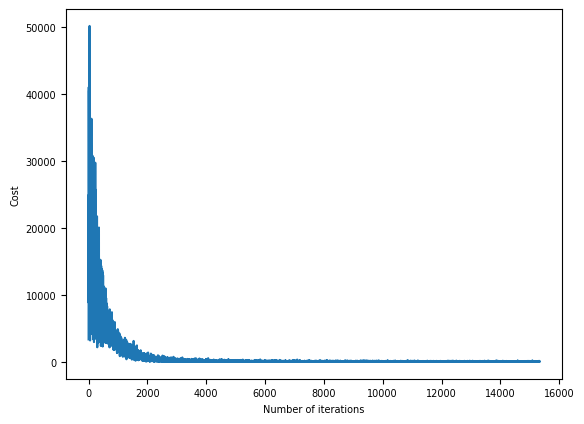

In [ ]:
model = Ridge(iterations = 10,learning_rate = 0.001, penalty = penalty, mini_batch_size=mini_batch_size)
model.fit(X_train_rr, y_train_rr, True)
X_test_rr= normalize_features(X_test_rr)
y_pred_rr = model.predict(X_test_rr)

In [ ]:
r2_ridge_reg = r2_score(y_test_rr,y_pred_rr)
print('Root square error:',r2_ridge_reg)

Root square error: 0.9931901340555048


# Random Forest

In [ ]:
df_imputed_final.head()

,TV,Radio,Sales,Total
0,16.0,6.566231,54.732757,25.474214
1,13.0,9.237765,46.677897,24.647332
2,41.0,15.886446,150.177829,59.799856
3,83.0,30.020028,298.246340,119.942332
4,15.0,8.437408,56.594181,24.843406


In [ ]:
# Selecting the relevant rows and columns and converting them to a NumPy Array

X_rf=df_imputed_final.iloc[:,0:2].values
y_rf=df_imputed_final.iloc[:,2].values

In [ ]:
# Splitting the data into training(67%) and testing(33%) datasets randomly
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf,y_rf,test_size = 0.33, random_state = 42)

In [ ]:
# Scaling the data
X_train_rf = normalize_features(X_train_rf)
X_test_rf = normalize_features(X_test_rf)

In [ ]:
def calculate_variance(data):
    if len(data) == 0:
        return 0
    mean = np.mean(data)
    variance = np.mean((data - mean) ** 2)
    return variance

Implementing a function that calculates the reduction in variance achieved by splitting the data into left and right subsets. A higher variance reduction indicates a better split, as it means the subsets are more homogeneous compared to the original data. By iterating over different split points and calculating the variance reduction for each split, the decision tree algorithm can determine the optimal split point that results in the highest reduction in variance.

In [ ]:
def variance_reduction(left, right, current_variance):
    p = float(len(left)) / (len(left) + len(right))
    return current_variance - p * calculate_variance(left) - (1 - p) * calculate_variance(right)

In [ ]:
def split_dataset(X, y, feature_index, threshold):
    left_indices = np.where(X[:, feature_index] <= threshold)[0]
    right_indices = np.where(X[:, feature_index] > threshold)[0]
    return X[left_indices], X[right_indices], y[left_indices], y[right_indices]

In [ ]:
def find_best_split(X, y):
    best_feature_index = None
    best_threshold = None
    best_variance_reduction = -float("inf")
    current_variance = calculate_variance(y)

    for feature_index in range(X.shape[1]):
        thresholds = np.unique(X[:, feature_index])
        for threshold in thresholds:
            X_left, X_right, y_left, y_right = split_dataset(X, y, feature_index, threshold)
            if len(X_left) > 0 and len(X_right) > 0:
                current_reduction = variance_reduction(y_left, y_right, current_variance)
                if current_reduction > best_variance_reduction:
                    best_variance_reduction = current_reduction
                    best_feature_index = feature_index
                    best_threshold = threshold

    return best_feature_index, best_threshold

In [ ]:
#Writing a function to create a leaf in the decision tree that takes the target variable y as input and returns the
#mean value of y as the predicted value for the leaf node.

def create_leaf(y):
    return np.mean(y)

Creating a function to recursively build the decision tree. If the stopping conditions are met, it creates a leaf node using 'create_leaf'. Otherwise, it finds the best feature and threshold to split the data using 'find_best_split'. If no such split is found, it creates a leaf node. If a split is found, it splits the data into left and right subsets using 'split_dataset'. It recursively builds the left and right subtrees by calling 'build_tree' on the respective subsets.

In [ ]:
def build_tree(X, y, max_depth, min_samples_split, depth=0):
    if len(y) <= min_samples_split or depth >= max_depth:
        return create_leaf(y)

    feature_index, threshold = find_best_split(X, y)
    if feature_index is None:
        return create_leaf(y)

    X_left, X_right, y_left, y_right = split_dataset(X, y, feature_index, threshold)

    left_subtree = build_tree(X_left, y_left, max_depth, min_samples_split, depth + 1)
    right_subtree = build_tree(X_right, y_right, max_depth, min_samples_split, depth + 1)

    return {"feature_index": feature_index, "threshold": threshold, "left": left_subtree, "right": right_subtree}

Creating a function that makes predictions based on the value of X. There are two cases-
1) If the tree is a dictionary- Compare the feature value of X with the threshold value. If it is less than that, recursively call the function on the left subtree. Else, recursively call the function on the right subtree
2) If the tree is not a dictionary (i.e., a leaf node)- Directly return the predicted value stored in the leaf.

In [ ]:
def predict_tree(tree, X):
    if isinstance(tree, dict):
        if X[tree["feature_index"]] <= tree["threshold"]:
            return predict_tree(tree["left"], X)
        else:
            return predict_tree(tree["right"], X)
    else:
        return tree


In [ ]:
# Creating a function that makes predictions for a set of input values using the trained decision tree .

def predict(X, tree):
    return np.array([predict_tree(tree, x) for x in X])

In [ ]:
# Building the decision tree using the training data and target variable.
tree = build_tree(X_train_rf, y_train_rf, max_depth=10, min_samples_split=2)

In [ ]:
# Making predictions using the trained decision tree on the testing data
predictions = predict(X_test_rf, tree)
print("Predictions:", predictions)
print("Tree:", tree)

Predictions: [ 96.424259   219.90604335  99.90110019 ...  88.65985385 336.80403058
  82.14573955]
Tree: {'feature_index': 0, 'threshold': 55.0, 'left': {'feature_index': 0, 'threshold': 32.0, 'left': {'feature_index': 0, 'threshold': 21.0, 'left': {'feature_index': 0, 'threshold': 16.0, 'left': {'feature_index': 0, 'threshold': 12.0, 'left': {'feature_index': 0, 'threshold': 11.0, 'left': {'feature_index': 0, 'threshold': 10.0, 'left': {'feature_index': 1, 'threshold': -1.8079498348701815, 'left': 33.58974662, 'right': {'feature_index': 1, 'threshold': -1.313021277886885, 'left': {'feature_index': 1, 'threshold': -1.7548804864804575, 'left': 35.52971354666666, 'right': 37.39605461333334}, 'right': {'feature_index': 1, 'threshold': -0.8170206320538403, 'left': 36.140675617, 'right': 34.11396192}}}, 'right': {'feature_index': 1, 'threshold': -1.8750085733193782, 'left': 34.05955871, 'right': {'feature_index': 1, 'threshold': -1.1338972797363336, 'left': {'feature_index': 1, 'threshold': 

In [ ]:
# Calculating the Mean Square Error in the predictions
mse=mean_squared_error(y_test_rf, predictions)

In [ ]:
mse

13.22382169212634

In [ ]:
def bootstrap_sample(X, y):
    indices = np.random.choice(len(X), size=len(X), replace=True)
    return X[indices], y[indices]

Creating a function that builds a random forest model consisting of multiple decision trees. It iterates 'n_trees times', creating a bootstrap sample of X and y using the 'bootstrap_sample' function. For each bootstrap sample, it builds a decision tree using the 'build_tree' function.

In [ ]:
def build_random_forest(X, y, n_trees, max_depth, min_samples_split):
    trees = []
    for _ in range(n_trees):
        X_sample, y_sample = bootstrap_sample(X, y)
        tree = build_tree(X_sample, y_sample, max_depth, min_samples_split)
        trees.append(tree)
    return trees

Creating a function that applies the 'predict' function to each tree in the forest, generating predictions for each data point in X and returning the mean of all the predictions.

In [ ]:
def predict_forest(X, trees):
    tree_predictions = np.array([predict(X, tree) for tree in trees])
    return np.mean(tree_predictions, axis=0)

In [ ]:
forest = build_random_forest(X_train_rf, y_train_rf, 10,10,2)

In [ ]:
predictions = predict_forest(X_test_rf, forest)

In [ ]:
#Calculating the R^2 score for the model
r2_rand_for = r2_score(y_test_rf, predictions)

In [ ]:
r2_rand_for

0.9986546544517088

# KNN

In [ ]:
# Creating a function that returns an array consisting of the Eucldian distances between the training data and the test instance.
def euclideanDistance(X_train, testInstance):
    return np.sqrt(np.sum((X_train - testInstance) ** 2, axis=1))

In [ ]:
# Getting the K- nearest neighbours of the Test Instance from the training data using the NumPy 'np.argsort' function
def getNeighbors(X_train, y_train, testInstance, k):
    distances = euclideanDistance(X_train, testInstance)
    nearest_indices = np.argsort(distances)[:k]
    neighbors = y_train[nearest_indices]
    return neighbors

In [ ]:
# Determining the predicted value for a test instance based on the target values of its k-nearest neighbors.
def getResponse(neighbors):
    return np.mean(neighbors)

In [ ]:
data = pd.read_csv("Dummy Data HSS.csv")

In [ ]:
# Preprocessing the data. Dropping the Influencer column and filling up the missing data values.
data.drop(columns=["Influencer"], inplace=True)
data.fillna(data.mean(), inplace=True)

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Getting the predicted values by considering the 3 nearest neighbours from the training dataset and storing them in a seperate column.

predictions = []
k = 3
for i in range(len(X_test)):
    neighbors = getNeighbors(X_train, y_train, X_test[i], k)
    result = getResponse(neighbors)
    predictions.append(result)

In [ ]:
r2_knn = r2_score(y_test, predictions)
print('r2 score:', r2_knn)

r2 score: 0.9945117750183508


# Comparison

In [ ]:
print(f"r2 score of linear regression: {r2_lin_reg}")
print(f"r2 score of linear regression with ridge regularization: {r2_ridge_reg}")
print(f"r2 score of random forest: {r2_rand_for}")
print(f"r2 score of KNN: {r2_knn}")

r2 score of linear regression: 0.99793373678669
r2 score of linear regression with ridge regularization: 0.9931901340555048
r2 score of random forest: 0.9986546544517088
r2 score of KNN: 0.9945117750183508


Model performance analysis:

Linear Regression:

R² Score: Consistently greater than R² Score of Regression using Ridge Regularization
Reasoning: Linear regression performs exceptionally well on this dataset, likely because the relationship between the features and the target variable is primarily linear. The high R² score indicates that the model explains almost all the variability in the target variable. This suggests that the dataset is well-suited to a linear model, with minimal noise and a clear linear relationship between the features and sales.

Ridge Regression:

R² Score: Consistently less than R² Score of Linear Regression without Regularization
Reasoning: Ridge regression, a regularized form of linear regression, slightly underperforms compared to standard linear regression. This slight drop in R² score indicates that regularization, which helps prevent overfitting by shrinking the coefficients, is not crucial for this dataset. The data likely has a low multicollinearity, so the benefits of regularization are minimal, resulting in a small decrease in the model's ability to explain the variance in the data.

Random Forest:

R² Score: 0.9986341833544677
Reasoning: Random Forest, a non-linear model, also performs very well, though marginally less than linear regression. This model's strength lies in its ability to capture non-linear relationships and interactions between features. The slightly lower R² compared to linear regression suggests that the additional complexity of Random Forest is not necessary for this dataset, as the linear relationships are already very strong and adequately captured by linear regression.

K-Nearest Neighbors (KNN):

R² Score: 0.9945117750183508
Reasoning: KNN, another non-linear model, performs well but not as well as linear regression or Random Forest. KNN relies on the proximity of data points to make predictions .KNN performs reasonably well but is less efficient at capturing the linear relationships compared to linear regression and Random Forest. The slightly lower R² score indicates that while KNN can model complex relationships, it might not be as efficient as linear regression in this case where linear patterns dominate.